# Lab 3: Red Hat Validated Models and Model Repository

### Recap:
In the last labs, we have achieved:
- Downlaod a open source model, serve it using `vLLM` with high inferencing performance 
- Optimize a open source model from huggingface by quantizing it to improve memory efficiency


With so many large language models (LLMs), inference server settings, and hardware accelerator options available, you should carefully evaluate the right mix for your needs to ensure the right tradeoffs between performance, accuracy, and cost for your use case.

To support this, Red Hat AI provides access to a repository of Third Party Models that are validated to run efficiently across the platform. This set of leading Third Party Models are run through capacity guidance planning scenarios, so you can make informed decisions about the right combination of model, deployment settings, and hardware accelerator for your domain specific use cases.

#### Red Hat AI repository on HuggingFace

[Red Hat AI on Huggingface](https://huggingface.co/RedHatAI)
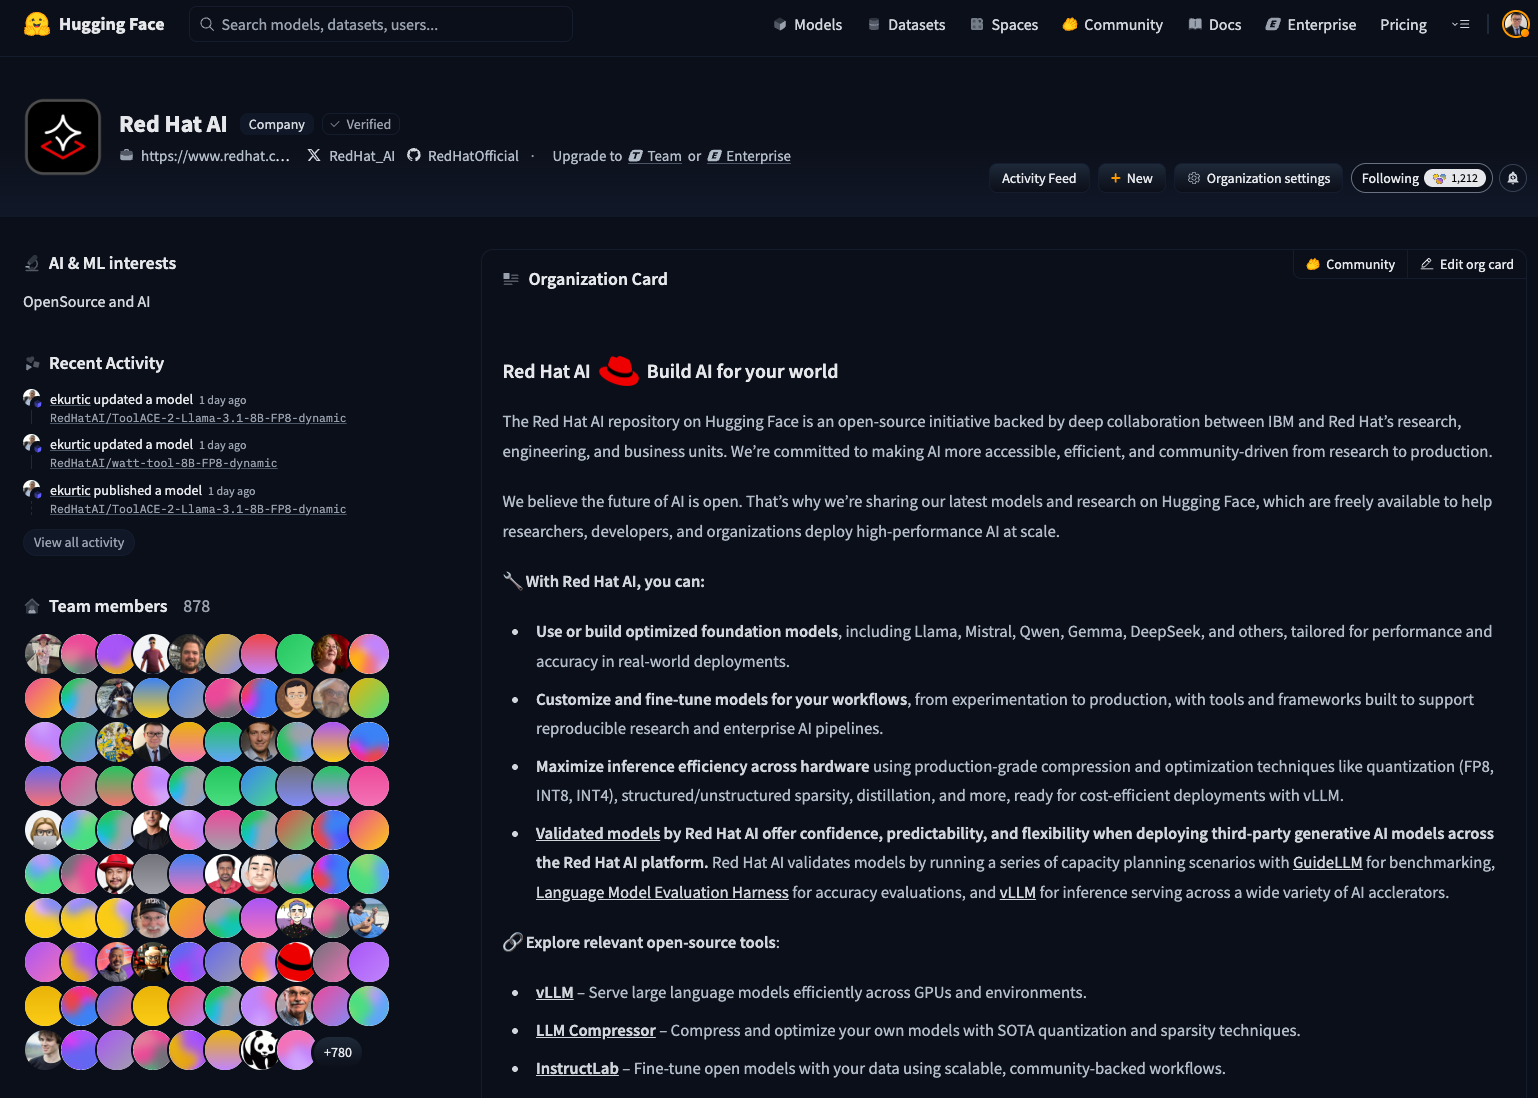

#### Features and Benefits
- **Increase flexibility** Access the collection of validated and optimized models ready for inference—hosted on Hugging Face—to reduce time to value, promote consistency, and increase reliability of your AI apps.
- **Optimized Inference** Optimize your AI infrastructure by choosing the right model, deployment settings, and hardware accelerators for a cost-effective, efficient deployment that aligns with your enterprise use cases.
- **Improved confidence** Access industry benchmarks, accuracy evaluations, and model optimization tools for evaluating, compressing, and validating Third Party Models across various deployment scenarios.

#### Validated Models
These aren't just any LLMs. We have tested Third Party Models using realistic scenarios to understand exactly how they will perform in the real world. We use specialized tooling to assess LLM performance across a range of hardware.
- **GuideLLM** evaluates performance and cost across hardware setups.
- **LM Evaluation Harness** tests model generalization across tasks.

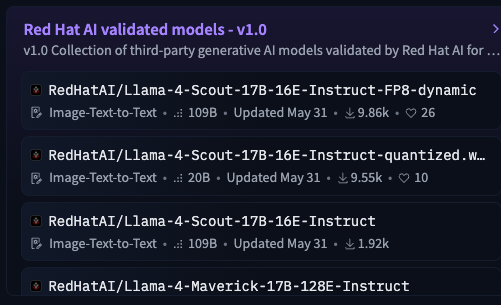

#### Optimized Models
Compressed for speed and efficiency. These LLMs are engineered to run faster and use fewer resources without sacrificing accuracy when deploying on vLLM. 
- **LLM Compressor** is an open source library that includes the latest research in model compression in a single tool, enabling easy generation of compressed models with minimal effort.
- **vLLM** is the leading open source high-throughput and memory-efficient inference and serving engine for optimized LLMs.

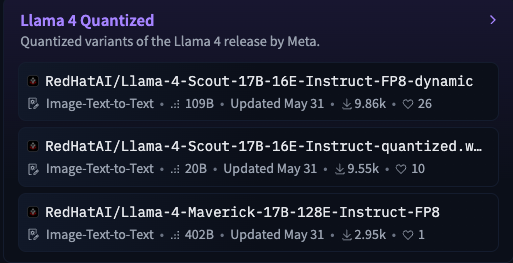

Given each quantizied model, we also publish the Evaluation and Recovery of accuracy.

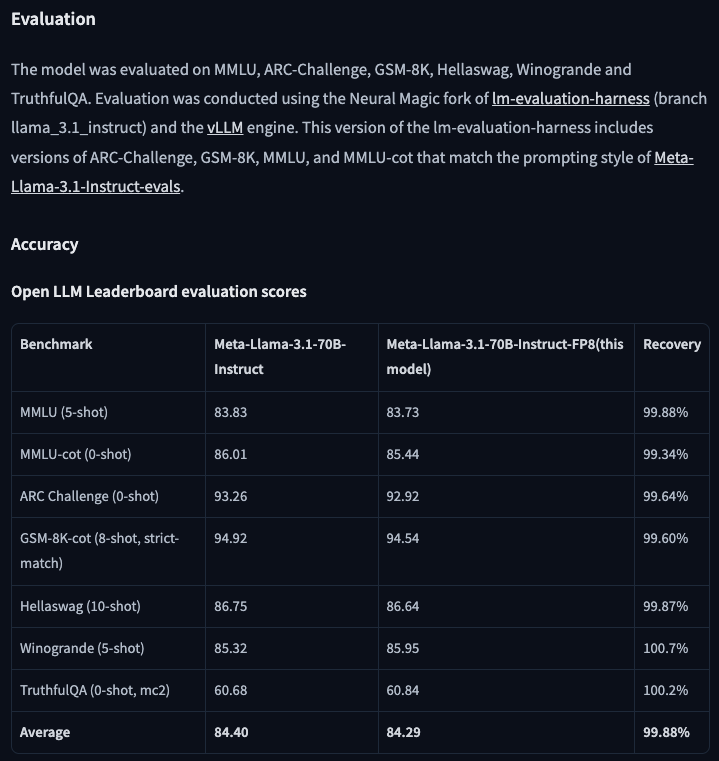

### Deploy a validated model on Red Hat OpenShift AI

Now let's try to deploy a validated model on OpenShift AI. 

Generally managing models in production environments is to use S3-compatible storage. The AI/Data team will push the pretrained models into S3 bucket, then operations team builds up a data pipeline to pull the model and serve it using the built-in serving runtime.

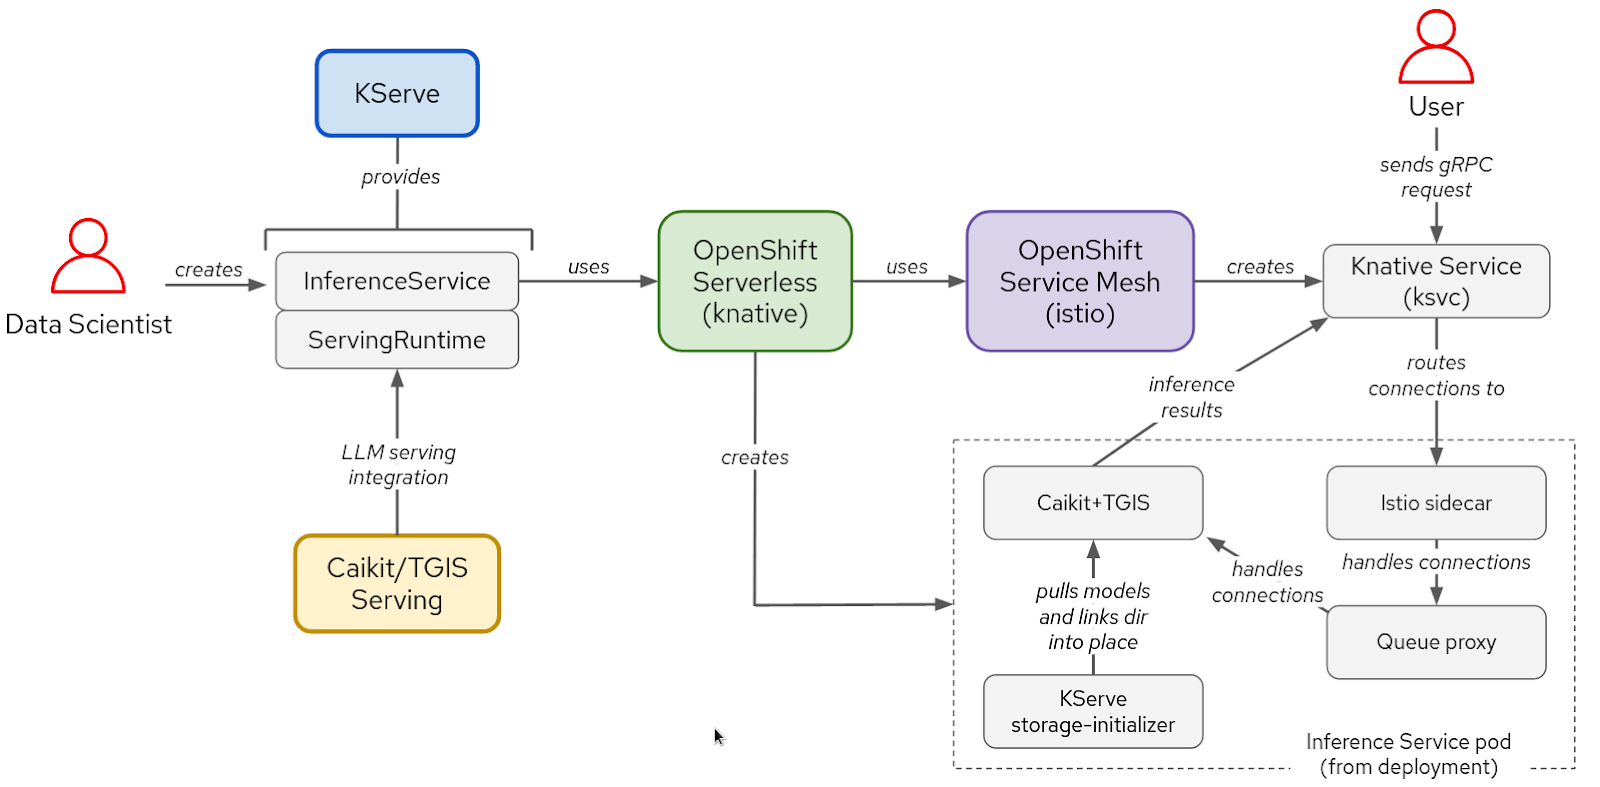

Red Hat OpenShift AI builds in a variety of serving runtime, including vLLM, OpenVINO, Caikit, LlamaCPP, and more.

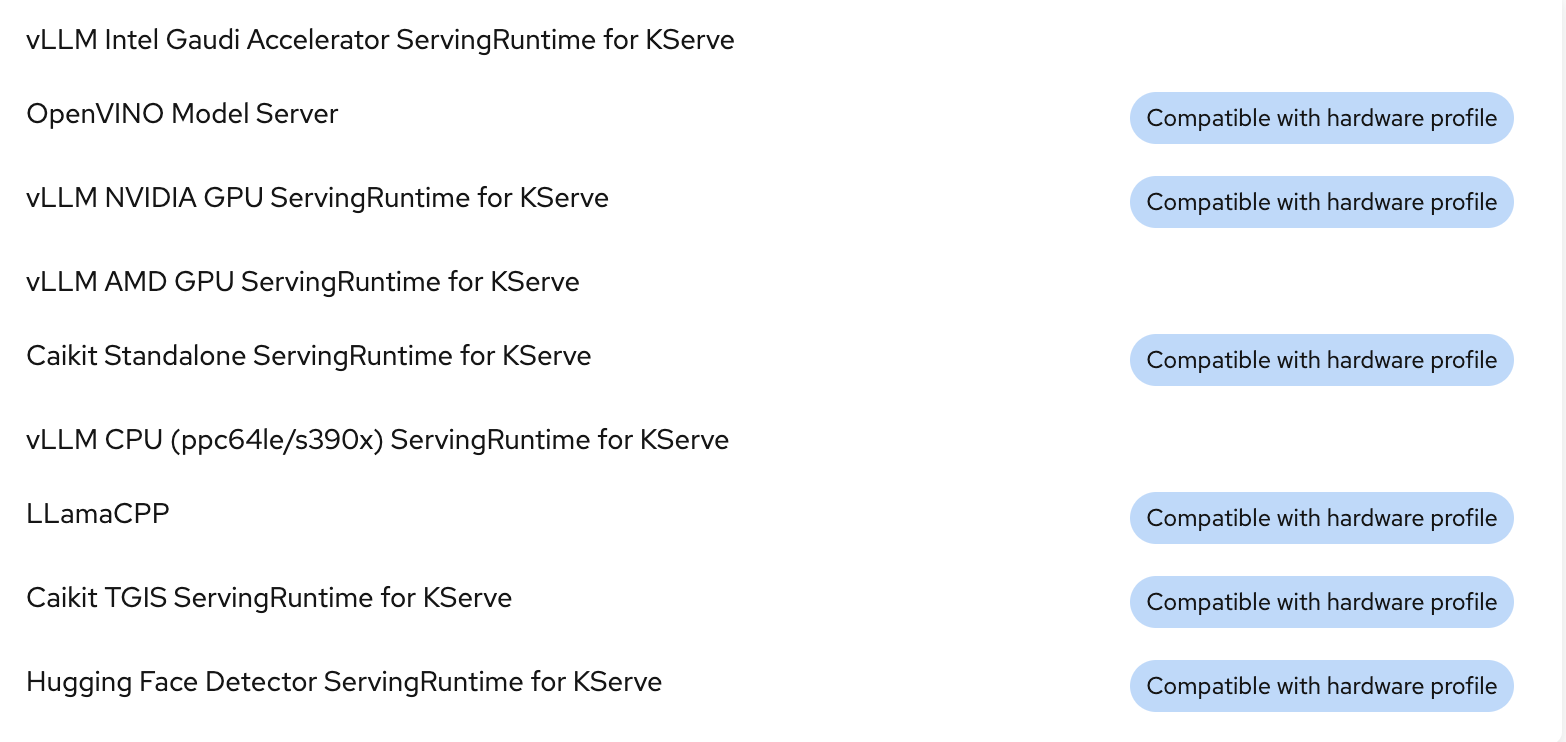

#### A modern way - KServe Modelcar approach

Managing models through S3 creates new challenges for traditional operations teams deploying production services, such as:
- Lack of model version control
- Access control complexity
- Operational overhead
- Latency and performance concerns
- No Metadata/Lineage tracking

OpenShift AI (since v2.14) enables the ability of serve models directly from a **container** using KServe's **ModelCar** capabilities to allow the user deploy a ModelCar image from the dashboard.

Let's walk through the steps.

Login OpenShift AI Web Console, Select the project we created before `vllm-demo`, Click the **Models**.

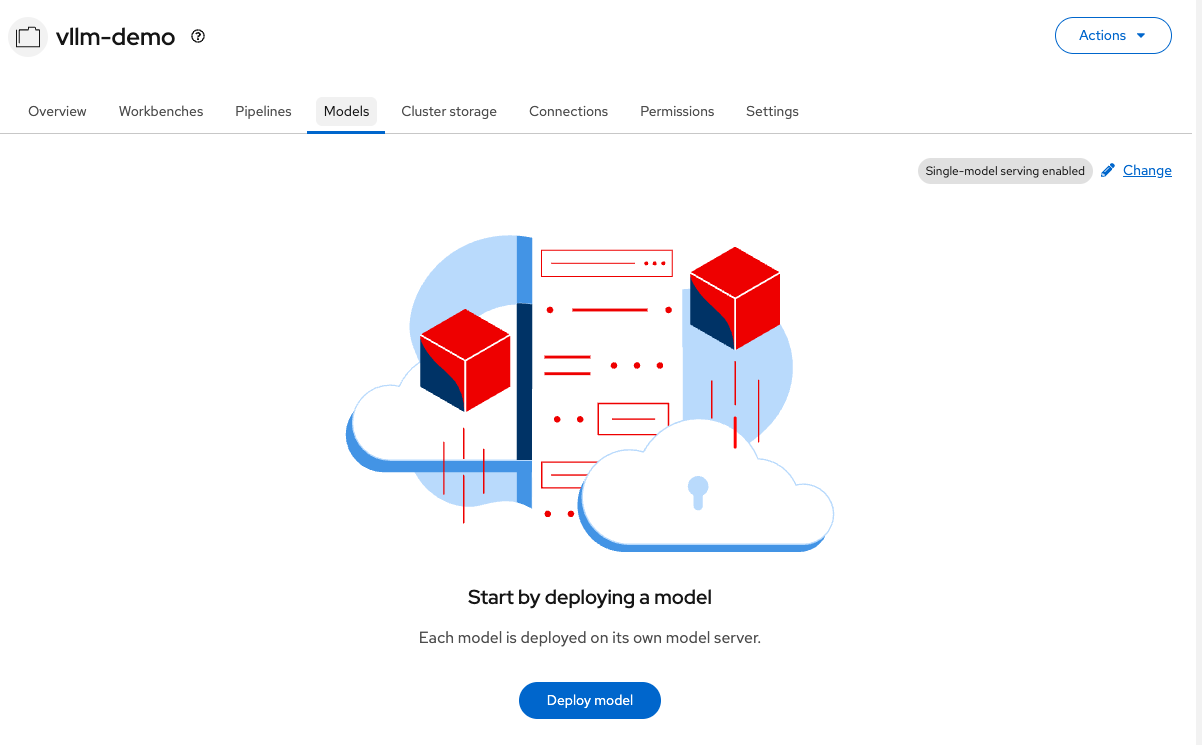

Click "**Deploy Model**", give the following parameters:
- **Model deployment name:** `llama-3.2-1b-instruct`   (**Note:** The model has to be on the ModelCar catalog at https://github.com/redhat-ai-services/modelcar-catalog)
- **Serving runtime:** `vLLM NVIDIA GPU ServingRuntime for KServe`
- **Connection type:** `OCI compliant registry - v1`
- **Connection name:** `llama3.2-1b-instruct`
- **URI:** `oci://quay.io/redhat-ai-services/modelcar-catalog:llama-3.2-1b-instruct`

Leave others as default values.

Wait until the Status turns to ✅.

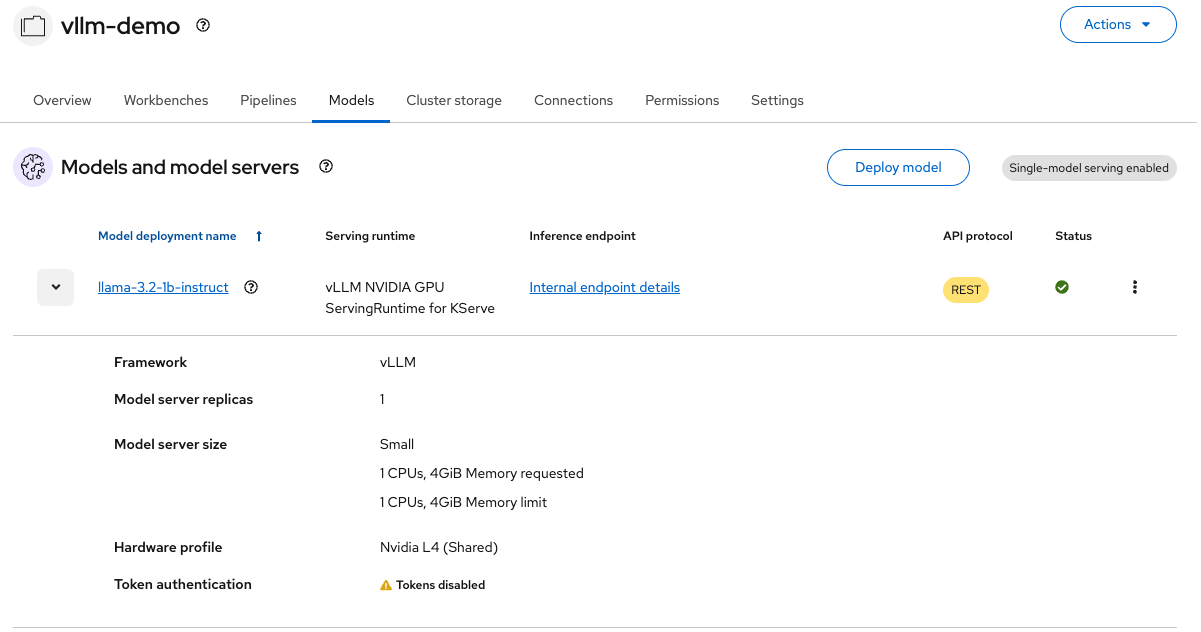

Click `Internal endpoint details` to save as inference endpoint.

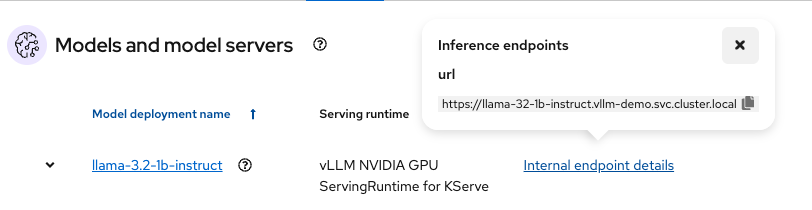

You now can use Curl to test out the inference endpoint.

In [12]:
!curl -X POST -H "Content-Type: application/json" -d '{ \
    "prompt": "What is the capital of France?", \
    "model": "llama3-2-3b" \
    "max_tokens": 50 \
}' http://llama3-2-3b-predictor.llama-serving.svc.cluster.local:8080/v1/completions

{"object":"error","message":"[{'type': 'json_invalid', 'loc': ('body', 84), 'msg': 'JSON decode error', 'input': {}, 'ctx': {'error': \"Expecting ',' delimiter\"}}]","type":"BadRequestError","param":null,"code":400}